In [394]:
#concatenate the results
import pandas as pd
import os
import csv
import readCSV

os.system('rm ./FinalResult.csv')
filelist=os.listdir('./')
toggle=0
data=None
for i in filelist:
    if 'experiments' in i:
        if toggle==0:
            print(i)
            data=pd.read_csv(i,index_col=False)
            data=data.drop(columns=['NO.'])
            toggle=1
        else:
            tmp=pd.read_csv(i,index_col=False)
            tmp=tmp.drop(columns=['NO.'])
            data = data.append(tmp,ignore_index=True)
data.to_csv("FinalResult.csv",index=False)

experiments2.csv


In [395]:
data=pd.read_csv('./FinalResult.csv',index_col=False)
data.head()
data['time/ms']/=1000
data['time/ms']=round(data['time/ms'],3)
data=data.rename(columns={"time/ms":"time/s"})
data['accuracy/%']=round(data['accuracy/%'],3)
data=data.rename(columns={"learning rate": "lr", "number of epoch": "ep", "number of executor": "ex", "size": "s","accuracy/%":"a","time/s":"tm"})
#now tm is counted using sec, a is counted using %

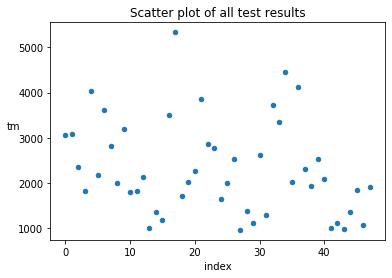

In [396]:
#draw scatter plot
import matplotlib.pyplot as plot
tmp=data
tmp["index"]=tmp.index
ax=tmp.plot.scatter("index",'tm',title="Scatter plot of all test results");
ax.yaxis.label.set_rotation(0)

In [397]:
import researchpy as rp
print(rp.summary_cont(data.groupby(['ep']))['tm'])
print(rp.summary_cont(data.groupby(['ex']))['tm'])
print(rp.summary_cont(data.groupby(['lr']))['tm'])
print(rp.summary_cont(data.groupby(['s']))['tm'])
#below are statistics of accuracy
print(rp.summary_cont(data.groupby(['ep']))['a'])
print(rp.summary_cont(data.groupby(['ex']))['a'])
print(rp.summary_cont(data.groupby(['lr']))['a'])
print(rp.summary_cont(data.groupby(['s']))['a'])



     N     Mean          SD          SE    95% Conf.     Interval
ep                                                               
10  24  1644.90  595.880378  121.633573  1406.498197  1883.301803
20  24  2991.54  940.814948  192.043047  2615.135628  3367.944372


     N         Mean           SD          SE    95% Conf.     Interval
ex                                                                    
1   24  2155.627375   928.747674  189.579825  1784.050918  2527.203832
3   24  2480.812625  1126.323510  229.909824  2030.189371  2931.435879


        N         Mean           SD          SE    95% Conf.     Interval
lr                                                                       
0.002  24  2333.438667  1220.710024  249.176390  1845.052942  2821.824392
0.010  24  2303.001333   834.105575  170.261087  1969.289602  2636.713065


     N         Mean           SD          SE    95% Conf.     Interval
s                                                                     
15  24

In [398]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
# Fits the model with the interaction term
# This will also automatically include the main effects for each factor
model = ols('tm ~ C(lr)*C(ep)*C(ex)*C(s)', data).fit()

# Seeing if the overall model is significant
#df_model should be: 1+4+6+4+1(intercept)-1 df_resid=32-1-15=16
print(f"Overall model F({model.df_model: .3f},{model.df_resid: .3f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
display(model.summary())
# Creates the ANOVA table
res = sm.stats.anova_lm(model, typ= 2)
res["Var"] = ["%.2f" % (x*100) + "%" for x in  res["sum_sq"] / sum(res["sum_sq"])]
res


Overall model F( 15.000, 32.000) =  11.542, p =  0.0000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     tm   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     11.54
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           6.01e-09
Time:                        11:17:30   Log-Likelihood:                -356.21
No. Observations:                  48   AIC:                             744.4
Df Residuals:                      32   BIC:                             774.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                        1554.4827    285.853      5.438      0.000     972.220    2136.745
C(lr)[T.0.01]                                     840.1747    404.257      2.078      0.046      16.731    1663.619
C(ep)[T.20]                                      2196.6047    404.257      5.434      0.000    1373.161    3020.049
C(ex)[T.3]                                        437.1017    404.257      1.081      0.288    -386.342    1260.546
C(s)[T.30]                                       -565.7837    404.257     -1.400      0.171   -1389.228     257.660
C(lr)[T.0.01]:C(ep)[T.20]                       -1495.1377    571.705     -2.615      0.013   -2659.663    -330.612
C(lr)[T.0.01]:C(ex)[T.3]                         -684.7217    571.705     -1.198      0.240   -1849.247     479.804
C(ep)[T.20]:C(ex)[T.3]                             18.1900    571.705      0.032      0.975   -1146.335    1182.715
C(lr)[T.0.01]:C(s)[T.30]                         -278.5880    571.705     -0.487      0.629   -1443.113     885.937
C(ep)[T.20]:C(s)[T.30]                          -1106.1973    571.705     -1.935      0.062   -2270.723      58.328
C(ex)[T.3]:C(s)[T.30]                            -302.6023    571.705     -0.529      0.600   -1467.128     861.923
C(lr)[T.0.01]:C(ep)[T.20]:C(ex)[T.3]              816.5770    808.513      1.010      0.320    -830.311    2463.465
C(lr)[T.0.01]:C(ep)[T.20]:C(s)[T.30]              685.0210    808.513      0.847      0.403    -961.867    2331.909
C(lr)[T.0.01]:C(ex)[T.3]:C(s)[T.30]               409.1920    808.513      0.506      0.616   -1237.696    2056.080
C(ep)[T.20]:C(ex)[T.3]:C(s)[T.30]                 741.1767    808.513      0.917      0.366    -905.711    2388.064
C(lr)[T.0.01]:C(ep)[T.20]:C(ex)[T.3]:C(s)[T.30]  -952.6867   1143.410     -0.833      0.411   -3281.738    1376.364
==============================================================================
Omnibus:                       10.560   Durbin-Watson:                   2.205
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               18.131
Skew:                          -0.532   Prob(JB):                     0.000116
Kurtosis:                       5.817   Cond. No.                         47.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,sum_sq,df,F,PR(>F),Var
C(lr),1.111718e+04,1.0,0.045351,8.327104e-01,0.02%
C(ep),2.176127e+07,1.0,88.772546,9.533011e-11,43.27%
C(ex),1.268945e+06,1.0,5.176513,2.973269e-02,2.52%
C(s),1.373151e+07,1.0,56.016062,1.608704e-08,27.31%
C(lr):C(ep),2.895980e+06,1.0,11.813808,1.650037e-03,5.76%
C(lr):C(ex),2.883164e+05,1.0,1.176153,2.862440e-01,0.57%
C(ep):C(ex),9.370914e+05,1.0,3.822754,5.934234e-02,1.86%
C(lr):C(s),2.762791e+03,1.0,0.011270,9.161161e-01,0.01%
C(ep):C(s),1.195506e+06,1.0,4.876926,3.450145e-02,2.38%
C(ex):C(s),3.552213e+03,1.0,0.014491,9.049365e-01,0.01%


In [399]:
#ANOVA for accuracy
from statsmodels.formula.api import ols
import statsmodels.api as sm
model = ols('a ~ C(lr)*C(ep)*C(ex)*C(s)', data).fit()
print(f"Overall model F({model.df_model: .3f},{model.df_resid: .3f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
display(model.summary())
# Creates the ANOVA table
res = sm.stats.anova_lm(model, typ= 2)
res["Var"] = ["%.2f" % (x*100) + "%" for x in  res["sum_sq"] / sum(res["sum_sq"])]
res

Overall model F( 15.000, 32.000) =  127.381, p =  0.0000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      a   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     127.4
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           3.63e-24
Time:                        11:17:30   Log-Likelihood:                 208.98
No. Observations:                  48   AIC:                            -386.0
Df Residuals:                      32   BIC:                            -356.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                           0.9320      0.002    423.624      0.000       0.928       0.936
C(lr)[T.0.01]                                       0.0433      0.003     13.927      0.000       0.037       0.050
C(ep)[T.20]                                         0.0090      0.003      2.893      0.007       0.003       0.015
C(ex)[T.3]                                          0.0007      0.003      0.214      0.832      -0.006       0.007
C(s)[T.30]                                         -0.0183      0.003     -5.892      0.000      -0.025      -0.012
C(lr)[T.0.01]:C(ep)[T.20]                          -0.0053      0.004     -1.212      0.234      -0.014       0.004
C(lr)[T.0.01]:C(ex)[T.3]                         -1.11e-15      0.004  -2.52e-13      1.000      -0.009       0.009
C(ep)[T.20]:C(ex)[T.3]                              0.0007      0.004      0.152      0.881      -0.008       0.010
C(lr)[T.0.01]:C(s)[T.30]                            0.0117      0.004      2.651      0.012       0.003       0.021
C(ep)[T.20]:C(s)[T.30]                              0.0067      0.004      1.515      0.140      -0.002       0.016
C(ex)[T.3]:C(s)[T.30]                              -0.0020      0.004     -0.455      0.653      -0.011       0.007
C(lr)[T.0.01]:C(ep)[T.20]:C(ex)[T.3]               -0.0010      0.006     -0.161      0.873      -0.014       0.012
C(lr)[T.0.01]:C(ep)[T.20]:C(s)[T.30]               -0.0037      0.006     -0.589      0.560      -0.016       0.009
C(lr)[T.0.01]:C(ex)[T.3]:C(s)[T.30]                 0.0047      0.006      0.750      0.459      -0.008       0.017
C(ep)[T.20]:C(ex)[T.3]:C(s)[T.30]                   0.0057      0.006      0.911      0.369      -0.007       0.018
C(lr)[T.0.01]:C(ep)[T.20]:C(ex)[T.3]:C(s)[T.30]    -0.0080      0.009     -0.909      0.370      -0.026       0.010
==============================================================================
Omnibus:                        7.434   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                9.794
Skew:                           0.410   Prob(JB):                      0.00747
Kurtosis:                       5.055   Cond. No.                         47.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,sum_sq,df,F,PR(>F),Var
C(lr),2.484300e-02,1.0,1710.852224,2.354988e-29,88.06%
C(ep),1.026750e-03,1.0,70.708752,1.312531e-09,3.64%
C(ex),2.133333e-05,1.0,1.469154,2.343531e-01,0.08%
C(s),1.083000e-03,1.0,74.582496,7.204358e-10,3.84%
C(lr):C(ep),2.803333e-04,1.0,19.305595,1.145020e-04,0.99%
C(lr):C(ex),8.333333e-08,1.0,0.005739,9.400853e-01,0.00%
C(ep):C(ex),3.000000e-06,1.0,0.206600,6.525141e-01,0.01%
C(lr):C(s),3.100833e-04,1.0,21.354376,5.956876e-05,1.10%
C(ep):C(s),9.633333e-05,1.0,6.634146,1.482755e-02,0.34%
C(ex):C(s),4.083333e-06,1.0,0.281205,5.995732e-01,0.01%


In [400]:
#creat interaction element
import pandas
def createInteraction(data:pandas.core.frame.DataFrame,columns:list):
    newColumnName=":".join(columns)
    toggle=True
    for i in range(len(columns)):
        if toggle:
            tmp=data[columns[i]]
            toggle=False
        else:
            tmp=tmp*data[columns[i]]
    data[newColumnName]=tmp

def optimizeFunc(model):
    const=None
    if 'const' in model.params.keys():
        const=model.params['const']
        modelcof=model.params.drop('const')
    else:
        modelcof=model.params  
    def f(x):
        sum=0
        for i in range(len(modelcof)):
            sum+=x[i]*modelcof[i]
        if const:
            sum+=const
        return sum
    return f

# backup=data.copy()

In [401]:
#runtime=e(epoch)+e(executor)+e(batchsize)+e(epoch:learninдrate)+e(epoch:batchsize)
data=backup.copy()
createInteraction(data,["lr","ep"])
createInteraction(data,["lr","s"])
createInteraction(data,["s","ep"])
#dataR=data.drop(columns=['lr','a'])
#dataR.head()
X = data[['ep','ex','s','lr:ep','s:ep']]
Y= data[['tm']]
# X = sm.add_constant(X) # adding a constan
modelRuntime = sm.OLS(Y, X).fit()
print(modelRuntime.summary())

                                 OLS Regression Results                                
Dep. Variable:                     tm   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              213.6
Date:                Tue, 04 Feb 2020   Prob (F-statistic):                    3.36e-29
Time:                        11:17:32   Log-Likelihood:                         -366.28
No. Observations:                  48   AIC:                                      742.6
Df Residuals:                      43   BIC:                                      751.9
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [402]:
#accuracy=e(learninдrate)+e(epoch)+e(batchsize)+e(epoch:learninдrate)+e(learning rate:batchsize)+e(epoch:batchsize)
X = data[['lr','ep','s','lr:ep','lr:s','s:ep']]
Y= data[['a']]
# X = sm.add_constant(X) # adding a constan
modelAccuracy = sm.OLS(Y, X).fit()
print(modelAccuracy.summary())

                                 OLS Regression Results                                
Dep. Variable:                      a   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              1035.
Date:                Tue, 04 Feb 2020   Prob (F-statistic):                    5.86e-44
Time:                        11:17:33   Log-Likelihood:                          54.290
No. Observations:                  48   AIC:                                     -96.58
Df Residuals:                      42   BIC:                                     -85.35
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [403]:
from scipy.optimize import minimize
import numpy as np

testRuntime=optimizeFunc(modelRuntime)

testf([20,1,15,0.20,300])

testAccuracy=optimizeFunc(modelAccuracy)

testAccuracy([0.010,20,30,0.20,0.30,600])

0.9015410099241118

In [404]:
#accuracy=e(learninдrate)+e(epoch)+e(batchsize)+e(epoch:learninдrate)+e(learning rate:batchsize)+e(epoch:batchsize)0
#runtime=e(epoch)+e(executor)+e(batchsize)+e(epoch:learninдrate)+e(epoch:batchsize)
dataforTest=data.copy()
dataforTest['preA']=testAccuracy([dataforTest['lr'],dataforTest['ep'],dataforTest['s'],dataforTest['lr:ep'],dataforTest['lr:s'],dataforTest['s:ep']])
dataforTest['preR']=testRuntime([dataforTest['ep'],dataforTest['ex'],dataforTest['s'],dataforTest['lr:ep'],dataforTest['s:ep']])
dataforTest.head()

,lr,ep,ex,s,a,tm,index,lr:ep,lr:s,s:ep,preA,preR
0,0.010,20,3,15,0.979,3074.233,0,0.20,0.15,300,1.040234,3745.418802
1,0.010,20,1,15,0.978,3088.426,1,0.20,0.15,300,1.040234,3414.183908
2,0.010,20,3,30,0.977,2349.878,2,0.20,0.30,600,0.901541,2341.918870
3,0.010,20,1,30,0.977,1826.878,3,0.20,0.30,600,0.901541,2010.683975
4,0.002,20,1,15,0.951,4035.064,4,0.04,0.03,300,0.985064,3647.210775


In [405]:
#mean and std of error
def calculateSV(data:pandas.core.frame.DataFrame,columns:list):
    result=data[columns[0]]-data[columns[1]]
    mean=np.mean(result)
    std=np.std(result)
    return float(mean),float(std)

In [406]:
modelRuntime.params

ep        247.167499
ex        165.617447
s          -2.137734
lr:ep   -1456.417917
s:ep       -4.571446
dtype: float64

In [407]:
modelAccuracy.params

lr       52.113179
ep        0.048788
s         0.030284
lr:ep    -1.589868
lr:s     -0.894634
s:ep     -0.001529
dtype: float64

In [421]:
#learner regression and optimization
e = 1e-10 
tmp=modelRuntime.params
tmp2=modelAccuracy.params
fun = lambda x : tmp[0]*x[1]+tmp[1]*x[2]+tmp[2]*x[3]+tmp[3]*(x[0]*x[1])+tmp[4]*(x[3]*x[1]) 
cons = (#{'type': 'eq', 'fun': lambda x: x[0] * x[1] * x[2] - 1}, 
        {'type': 'ineq', 'fun': lambda x : tmp2[0]*x[0]+tmp2[1]*x[1]+tmp2[2]*x[3]+tmp2[3]*(x[0]*x[1])+tmp2[4]*x[0]*x[3]+tmp2[5]*x[1]*x[3]-0.9},
        {'type': 'ineq', 'fun':lambda x : tmp[0]*x[1]+tmp[1]*x[2]+tmp[2]*x[3]+tmp[3]*(x[0]*x[1])+tmp[4]*(x[3]*x[1])}
       )
x0 = np.array((0.01, 1.0, 1.0,1.0)) #x0 is the initialization of lr,ep,ex,s

bnds=((0.002, 0.10), (8, 40),(1,2),(0,50))
res = minimize(fun, x0, method='SLSQP', bounds=bnds,constraints=cons)#
print('Minimum:',res.fun)
print('Optimal Solution:',res.x)
print('Iteration ends with status:', res.success)
print('Ending reason:', res.message)

Minimum: 0.41496597064963225
Optimal Solution: [ 0.09996438  8.00000277  1.00000051 25.26067519]
Iteration ends with status: False
Ending reason: Positive directional derivative for linesearch


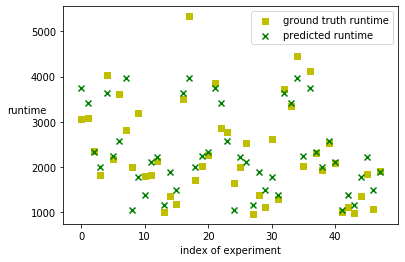

mean:1.5124110576933276 std:498.59871736645977


In [411]:
#test on all data
import matplotlib.pyplot as plot
tmp=dataforTest
tmp["index"]=tmp.index
fig = plot.figure()
ax = fig.add_subplot()
ax.scatter(tmp["index"],tmp['tm'],color='y',marker="s",label='ground truth runtime');
ax.scatter(tmp["index"],tmp['preR'],color='g',marker="x",label='predicted runtime');
plot.xlabel('index of experiment')
plot.ylabel('runtime')
ax.yaxis.label.set_rotation(0)
plot.legend(loc='best')
plot.show()

mean,std=calculateSV(dataforTest,['tm','preR'])
print('mean:'+str(mean)+' std:'+str(std))

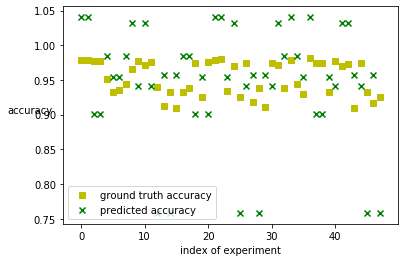

mean:0.006529042615292378 std:0.07781040433167764


In [412]:
fig = plot.figure()
ax2 = fig.add_subplot()
ax2.scatter(tmp["index"],tmp['a'],color='y',marker="s",label='ground truth accuracy');
ax2.scatter(tmp["index"],tmp['preA'],color='g',marker="x",label='predicted accuracy');
plot.xlabel('index of experiment')
plot.ylabel('accuracy')
ax2.yaxis.label.set_rotation(0)
plot.legend(loc='best')
plot.show()

mean,std=calculateSV(dataforTest,['a','preA'])
print('mean:'+str(mean)+' std:'+str(std))